In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

In [6]:
# Load the dataset
Ames = pd.read_csv('Ames.csv')

# Convert the DataFrame to a GeoDataFrame
geometry = [Point(xy) for xy in zip(Ames['Longitude'], Ames['Latitude'])]
geo_df = gpd.GeoDataFrame(Ames, geometry=geometry)

In [8]:
# Set the CRS for the GeoDataFrame
geo_df.crs = "EPSG:4326"

In [10]:
convex_hull = geo_df.unary_union.convex_hull
convex_hull_geo = gpd.GeoSeries(convex_hull, crs="EPSG:4326")
convex_hull_transformed = convex_hull_geo.to_crs(epsg=3857)
buffered_hull = convex_hull_transformed.buffer(500)

C:\Users\RSSpe\AppData\Local\Temp\ipykernel_11148\3883448628.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  convex_hull = geo_df.unary_union.convex_hull
D:\Anaconda\envs\cursoDeepLearning\Lib\site-packages\shapely\set_operations.py:553: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)
D:\Anaconda\envs\cursoDeepLearning\Lib\site-packages\shapely\constructive.py:486: RuntimeWarning: invalid value encountered in convex_hull
  return lib.convex_hull(geometry, **kwargs)


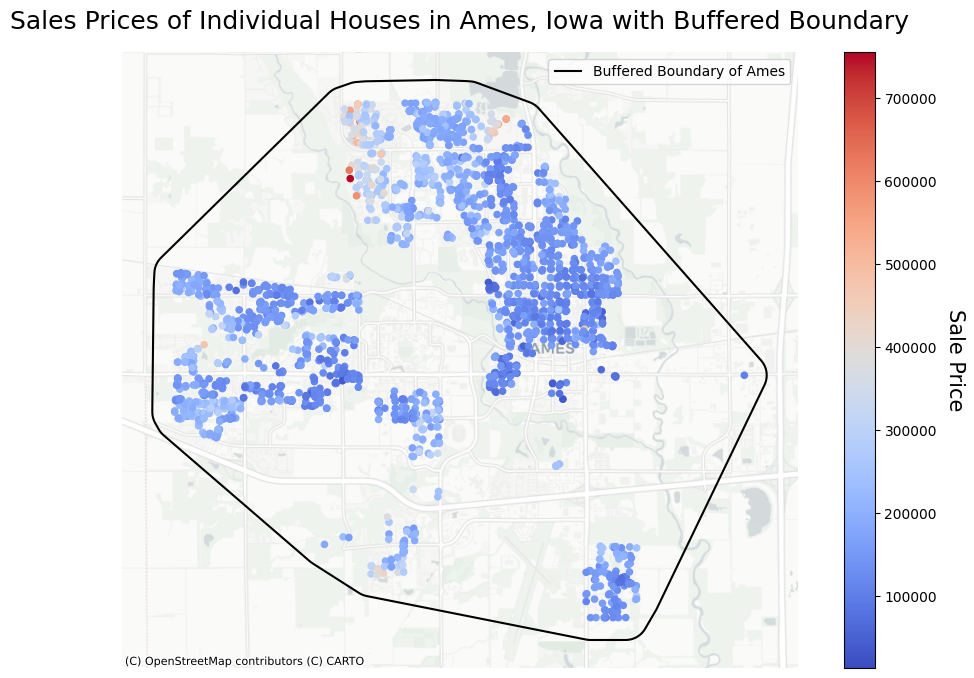

In [12]:
# Plotting the map with Sale Prices, a base map, and the buffered convex hull as a border
fig, ax = plt.subplots(figsize=(12, 8))

geo_df.set_crs(epsg=4326).to_crs(epsg=3857).plot(column='SalePrice', cmap='coolwarm', ax=ax, legend=True, markersize=20)

buffered_hull.boundary.plot(ax=ax, color='black', label='Buffered Boundary of Ames')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

ax.set_axis_off()
ax.legend(loc='upper right')
colorbar = ax.get_figure().get_axes()[1]
colorbar.set_ylabel('Sale Price', rotation=270, labelpad=20, fontsize=15)
plt.title('Sales Prices of Individual Houses in Ames, Iowa with Buffered Boundary', fontsize=18)
plt.show()